# Using tree based methods on the `OJ` dataset

## Preparing the data

Information on the dataset can be [found here](https://rdrr.io/cran/ISLR/man/OJ.html)

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set_style('whitegrid')
oj = pd.read_csv('../../datasets/OJ.csv', index_col=0)
oj = oj.reset_index(drop=True)
oj.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [28]:
oj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 18 columns):
Purchase          1070 non-null object
WeekofPurchase    1070 non-null int64
StoreID           1070 non-null int64
PriceCH           1070 non-null float64
PriceMM           1070 non-null float64
DiscCH            1070 non-null float64
DiscMM            1070 non-null float64
SpecialCH         1070 non-null int64
SpecialMM         1070 non-null int64
LoyalCH           1070 non-null float64
SalePriceMM       1070 non-null float64
SalePriceCH       1070 non-null float64
PriceDiff         1070 non-null float64
Store7            1070 non-null object
PctDiscMM         1070 non-null float64
PctDiscCH         1070 non-null float64
ListPriceDiff     1070 non-null float64
STORE             1070 non-null int64
dtypes: float64(11), int64(5), object(2)
memory usage: 150.5+ KB


In [29]:
for col in oj.columns:
    print('Unique values of {} are {}'.format(col, oj[col].unique()))
    print('\n')

Unique values of Purchase are ['CH' 'MM']


Unique values of WeekofPurchase are [237 239 245 227 228 230 232 234 235 238 240 263 276 268 278 269 254 257
 258 259 264 271 272 274 246 265 275 251 256 277 229 233 236 244 247 248
 249 252 260 266 267 270 255 273 242 241 243 253 261 231 250 262]


Unique values of StoreID are [1 7 2 3 4]


Unique values of PriceCH are [1.75 1.86 1.69 1.99 2.06 1.76 1.89 1.96 1.79 2.09]


Unique values of PriceMM are [1.99 2.09 1.69 2.13 2.18 2.23 2.29 1.79]


Unique values of DiscCH are [0.   0.17 0.27 0.37 0.47 0.24 0.1  0.2  0.13 0.5  0.3  0.16]


Unique values of DiscMM are [0.   0.3  0.4  0.54 0.8  0.2  0.7  0.1  0.06 0.24 0.6  0.74]


Unique values of SpecialCH are [0 1]


Unique values of SpecialMM are [0 1]


Unique values of LoyalCH are [5.00000e-01 6.00000e-01 6.80000e-01 4.00000e-01 9.56535e-01 9.65228e-01
 9.72182e-01 9.77746e-01 9.82197e-01 9.85757e-01 9.88606e-01 9.90885e-01
 9.92708e-01 7.44000e-01 7.95200e-01 3.20000e-01 8.36160e-01 8.68928e-

In [30]:
# drop superfluous variables
oj = oj.drop(columns=['STORE', 'Store7'])

In [31]:
oj.columns

Index(['Purchase', 'WeekofPurchase', 'StoreID', 'PriceCH', 'PriceMM', 'DiscCH',
       'DiscMM', 'SpecialCH', 'SpecialMM', 'LoyalCH', 'SalePriceMM',
       'SalePriceCH', 'PriceDiff', 'PctDiscMM', 'PctDiscCH', 'ListPriceDiff'],
      dtype='object')

In [32]:
# one hot encode categoricals
cat_vars = ['StoreID', 'Purchase']

oj = pd.get_dummies(data=oj, columns=cat_vars, drop_first=True)
oj.head()

,WeekofPurchase,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,StoreID_2,StoreID_3,StoreID_4,StoreID_7,Purchase_MM
0,237,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,0.000000,0.000000,0.24,0,0,0,0,0
1,239,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,0.150754,0.000000,0.24,0,0,0,0,0
2,245,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,0.000000,0.091398,0.23,0,0,0,0,0
3,227,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,0.000000,0.000000,0.00,0,0,0,0,1
4,228,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,0.000000,0.000000,0.00,0,0,0,1,0


In [111]:
oj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 18 columns):
Purchase          1070 non-null object
WeekofPurchase    1070 non-null int64
StoreID           1070 non-null int64
PriceCH           1070 non-null float64
PriceMM           1070 non-null float64
DiscCH            1070 non-null float64
DiscMM            1070 non-null float64
SpecialCH         1070 non-null int64
SpecialMM         1070 non-null int64
LoyalCH           1070 non-null float64
SalePriceMM       1070 non-null float64
SalePriceCH       1070 non-null float64
PriceDiff         1070 non-null float64
Store7            1070 non-null object
PctDiscMM         1070 non-null float64
PctDiscCH         1070 non-null float64
ListPriceDiff     1070 non-null float64
STORE             1070 non-null int64
dtypes: float64(11), int64(5), object(2)
memory usage: 150.5+ KB


## a. Train-test split

In [33]:
from sklearn.model_selection import train_test_split

X, y = oj.drop(columns=['Purchase_MM']), oj['Purchase_MM']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=800, random_state=27)
X_train.shape

/anaconda3/envs/islr/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


(800, 18)

## b. Classification Tree for predicting `Purchase`

In [34]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(random_state=27)
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=27,
            splitter='best')

In [35]:
# training error rate
clf_tree.score(X_train, y_train)

0.98875

In [36]:
# test error rate
clf_tree.score(X_test, y_test)

0.7777777777777778

The following is lifted straight from the [`sklearn` docs](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py):

In [41]:
estimator = clf_tree
n_nodes = estimator.tree_.node_count
children_left = estimator.tree_.children_left
children_right = estimator.tree_.children_right
feature = estimator.tree_.feature
threshold = estimator.tree_.threshold


# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

# number of leaves = number of terminal nodes
np.sum(is_leaves)

165

## c. Classification tree feature importances

In [44]:
# feature importances
clf_tree_feat_imp = pd.DataFrame({'feature': X_train.columns, 
                            'importance': clf_tree.feature_importances_})
clf_tree_feat_imp.sort_values(by='importance', ascending=False)

,feature,importance
7,LoyalCH,0.659534
0,WeekofPurchase,0.098166
10,PriceDiff,0.085502
13,ListPriceDiff,0.026363
8,SalePriceMM,0.024777
1,PriceCH,0.016979
14,StoreID_2,0.013228
5,SpecialCH,0.010388
9,SalePriceCH,0.010037
15,StoreID_3,0.009939


## d. Classification tree plot

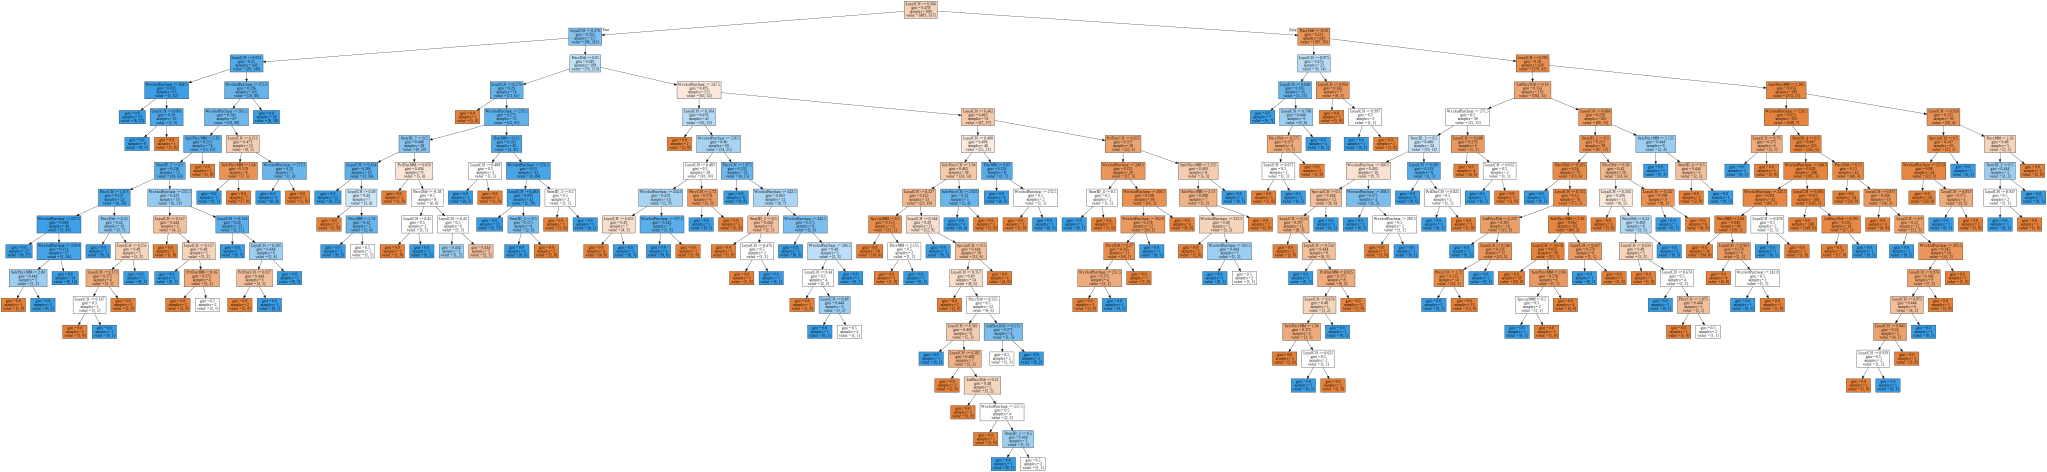

In [45]:
from graphviz import Source
from sklearn import tree
from IPython.display import SVG
graph = Source(tree.export_graphviz(clf_tree, out_file=None, filled=True, 
                                    feature_names=X.columns))
display(SVG(graph.pipe(format='svg')))

## e. Confusion matrix for test data

This [Stack Overflow post](https://stackoverflow.com/questions/2148543/how-to-write-a-confusion-matrix-in-python) was helpful

In [78]:
from sklearn.metrics import confusion_matrix

y_act = pd.Series(['Purchase_CH' if entry == 0 else "Purchase_MM" for entry in y_test],
                  name='Actual')
y_pred = pd.Series(['Purchase_CH' if entry == 0 else "Purchase_MM" for entry in clf_tree.predict(X_test)],
                  name='Predicted')
clf_tree_test_conf = pd.crosstab(y_act, y_pred, margins=True)
clf_tree_test_conf


Predicted,Purchase_CH,Purchase_MM,All
Actual,,,
Purchase_CH,136,34,170
Purchase_MM,26,74,100
All,162,108,270


## f. Cross-validation for optimal tree size

In [84]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': list(range(1, 800)) + [None]}
clf_tree = DecisionTreeClassifier(random_state=27)
clf_tree_search = GridSearchCV(estimator=clf_tree, 
                               param_grid=params,
                               cv=8,
                               scoring='accuracy')

%timeit -n1 -r1 clf_tree_search.fit(X_train, y_train)

44.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [95]:
clf_tree_search.best_params_

{'max_depth': 2}

In [106]:
clf_tree_search.best_score_

0.8075

## g. Plot of CV error vs. tree size

In [93]:
clf_tree_search_df = pd.DataFrame(clf_tree_search.cv_results_)
clf_tree_search_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,mean_train_score,std_train_score
0,0.003523,0.000421,0.001491,0.000361,1,{'max_depth': 1},0.801980,0.841584,0.811881,0.76,...,0.816881,0.811159,0.809728,0.817143,0.817143,0.814551,0.810271,0.803138,0.812502,0.004591
1,0.002702,0.000291,0.001097,0.000200,2,{'max_depth': 2},0.801980,0.841584,0.811881,0.78,...,0.816881,0.811159,0.816881,0.827143,0.821429,0.818830,0.817404,0.810271,0.817500,0.005043
2,0.003065,0.000534,0.001211,0.000264,3,{'max_depth': 3},0.811881,0.801980,0.831683,0.73,...,0.826896,0.831187,0.836910,0.851429,0.844286,0.841655,0.841655,0.830243,0.838032,0.007727
3,0.002972,0.000107,0.000967,0.000055,4,{'max_depth': 4},0.801980,0.811881,0.831683,0.73,...,0.856938,0.841202,0.841202,0.868571,0.847143,0.861626,0.858773,0.844508,0.852495,0.009673
4,0.003204,0.000121,0.000971,0.000060,5,{'max_depth': 5},0.782178,0.821782,0.801980,0.75,...,0.868383,0.852647,0.856938,0.880000,0.865714,0.873039,0.881598,0.864479,0.867850,0.009552


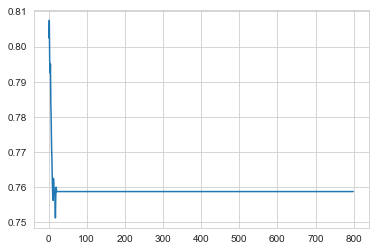

In [107]:
x, y = clv_tree_search_df['param_max_depth'], clv_tree_search_df['mean_test_score']
plt.plot(x, y)

We chose an upper limit of 799 for the maximum tree depth (in a worst case scenario, the decision tree partitions into unique regions for each observation). This is clearly overkill

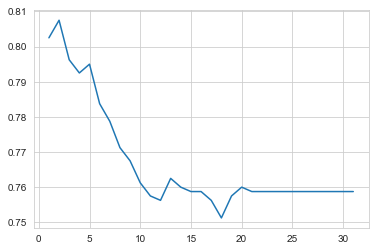

In [110]:
plt.plot(x.loc[:30, ], y.loc[:30, ])

In [ ]:
plt.plot(np.arange(y))

A maximum tree depth of 2 leads to the best cv test error!

# i. Pruning a tree with depth 2

In [122]:
from sklearn.model_selection import RandomizedSearchCV

params = {'max_features': np.arange(1, 18),
          'max_leaf_nodes': np.append(np.arange(2, 21), None),
          'min_impurity_decrease': np.linspace(0, 1, 10),
          'min_samples_leaf': np.arange(1, 11)
          }
clf_tree2 = DecisionTreeClassifier(random_state=27, max_depth=2)

# Randomized search to cover a large region of parameter space
clf_tree2_rvsearch = RandomizedSearchCV(estimator=clf_tree2,
                                        param_distributions=params,
                                        cv=8,
                                        scoring='accuracy',
                                        n_iter=1000,
                                        random_state=27)
%timeit -n1 -r1 clf_tree2_rvsearch.fit(X_train, y_train)

39.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


/anaconda3/envs/islr/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [123]:
clf_tree2_rvsearch.best_params_

{'min_samples_leaf': 6,
 'min_impurity_decrease': 0.0,
 'max_leaf_nodes': None,
 'max_features': 16}

In [125]:
# Grid search nearby randomized search results
params = {'min_samples_leaf': np.arange(4, 8),
          'max_features': np.arange(10, 16)
         }
clf_tree3 = DecisionTreeClassifier(random_state=27, 
                                   max_depth=2,
                                   max_leaf_nodes=None)
clf_tree2_gridsearch = GridSearchCV(estimator=clf_tree3,
                                    param_grid=params,
                                    cv=8,
                                    scoring='accuracy')
%timeit -n1 -r1 clf_tree2_gridsearch.fit(X_train, y_train)

1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


/anaconda3/envs/islr/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [127]:
clf_tree2_gridsearch.best_params_

{'max_features': 15, 'min_samples_leaf': 4}

In [128]:
clf_tree2_gridsearch.best_score_

0.8075

## j. Comparing training error rates

In [131]:
from sklearn.metrics import accuracy_score

# trees for comparison
clf_tree = clf_tree_search.best_estimator_
pruned_clf_tree = clf_tree2_gridsearch.best_estimator_

# train and test errors
train = [accuracy_score(clf_tree.predict(X_train), y_train), 
         accuracy_score(pruned_clf_tree.predict(X_train), y_train)]
test = [accuracy_score(clf_tree.predict(X_test), y_test), 
         accuracy_score(pruned_clf_tree.predict(X_test), y_test)]

# df for results
comp_df = pd.DataFrame({'train_error': train, 'test_error': test}, 
                       index=['clf_tree', 'pruned_clf_tree'])
comp_df

,train_error,test_error
clf_tree,0.81625,0.785185
pruned_clf_tree,0.81625,0.785185
